In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import datetime as dt
from pandas import Series, DataFrame

style.use('ggplot')
%matplotlib inline

First, we need to establish a start and end time for our query. After establishing the start and end time, the data can be quried. 

In [84]:
start = dt.datetime(1990, 1, 1)
end = dt.datetime.now()
pep_raw = web.DataReader("PEP", 'morningstar', start, end)

In [85]:
pep_raw.head()

Close    High     Low    Open   Volume
Symbol Date                                               
PEP    1990-01-01  9.8039  9.8039  9.6699  9.8039        0
       1990-01-02  9.8423  9.8423  9.6316  9.8423  3468979
       1990-01-03  9.7465  9.8997  9.7274  9.7465  3722918
       1990-01-04  9.6507  9.7082  9.4975  9.6507  2993740
       1990-01-05  9.5167  9.6507  9.4401  9.5167  3759475

In [86]:
pep_raw.tail()

Close     High     Low    Open   Volume
Symbol Date                                                
PEP    2018-05-24  100.18  100.580   99.76  100.31  4664307
       2018-05-25  100.31  101.110   99.90  100.18  5324275
       2018-05-28  100.31  100.310  100.31  100.31        0
       2018-05-29  101.10  101.285  100.00  100.00  8302569
       2018-05-30  101.83  102.240  101.09  101.66  6246348

We need to reset the index to "Date" and then drop the "Symbol" column 

In [87]:
pep_raw.reset_index(inplace=True)
pep_raw.set_index("Date", inplace=True)
pep_raw = pep_raw.drop("Symbol", axis=1)

In [88]:
pep_raw.head()

,Close,High,Low,Open,Volume
Date,,,,,
1990-01-01,9.8039,9.8039,9.6699,9.8039,0
1990-01-02,9.8423,9.8423,9.6316,9.8423,3468979
1990-01-03,9.7465,9.8997,9.7274,9.7465,3722918
1990-01-04,9.6507,9.7082,9.4975,9.6507,2993740
1990-01-05,9.5167,9.6507,9.4401,9.5167,3759475


In [89]:
pep_raw.to_csv('PEP.csv')

In [90]:
pep = pd.read_csv('PEP.csv', parse_dates=True, index_col=0)

In [91]:
pep.head()

,Close,High,Low,Open,Volume
Date,,,,,
1990-01-01,9.8039,9.8039,9.6699,9.8039,0
1990-01-02,9.8423,9.8423,9.6316,9.8423,3468979
1990-01-03,9.7465,9.8997,9.7274,9.7465,3722918
1990-01-04,9.6507,9.7082,9.4975,9.6507,2993740
1990-01-05,9.5167,9.6507,9.4401,9.5167,3759475


Now that we have the data, lets see how this looks when we plot it

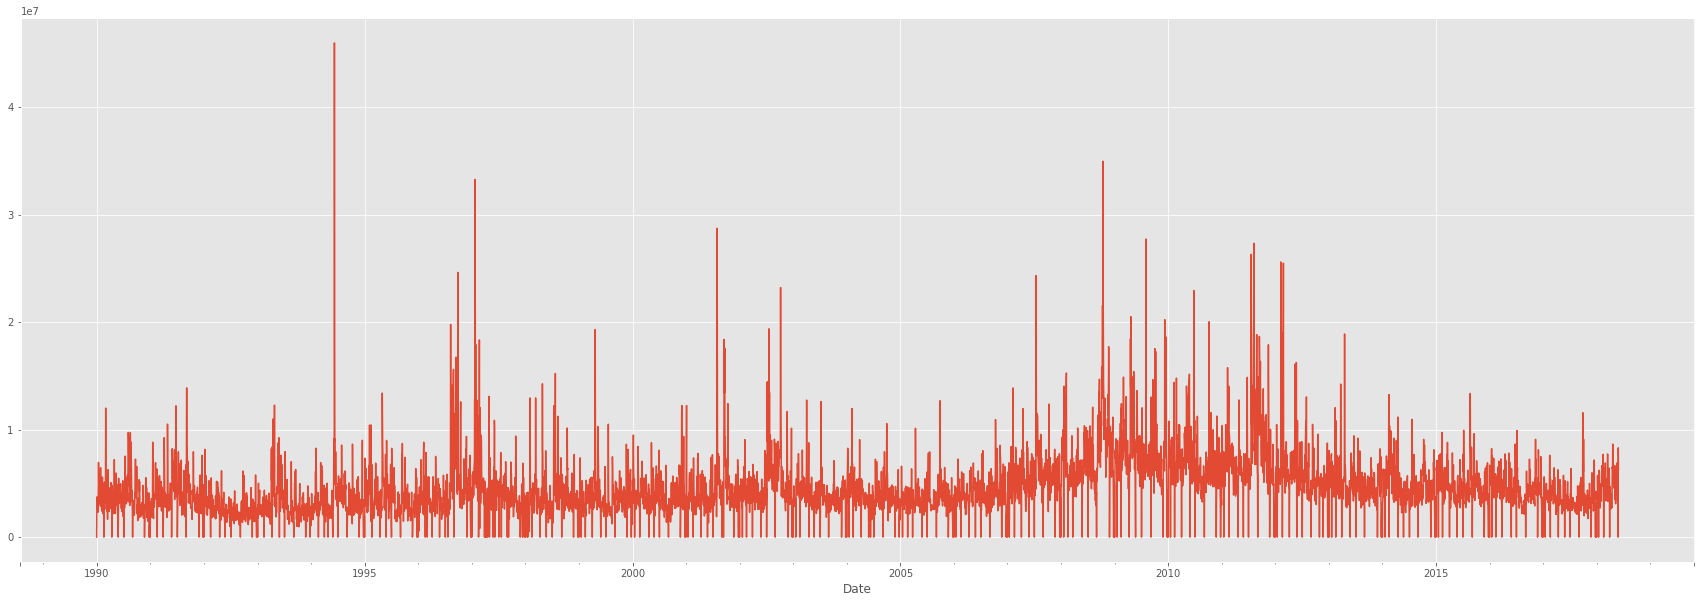

In [92]:
pep['Volume'].plot()
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

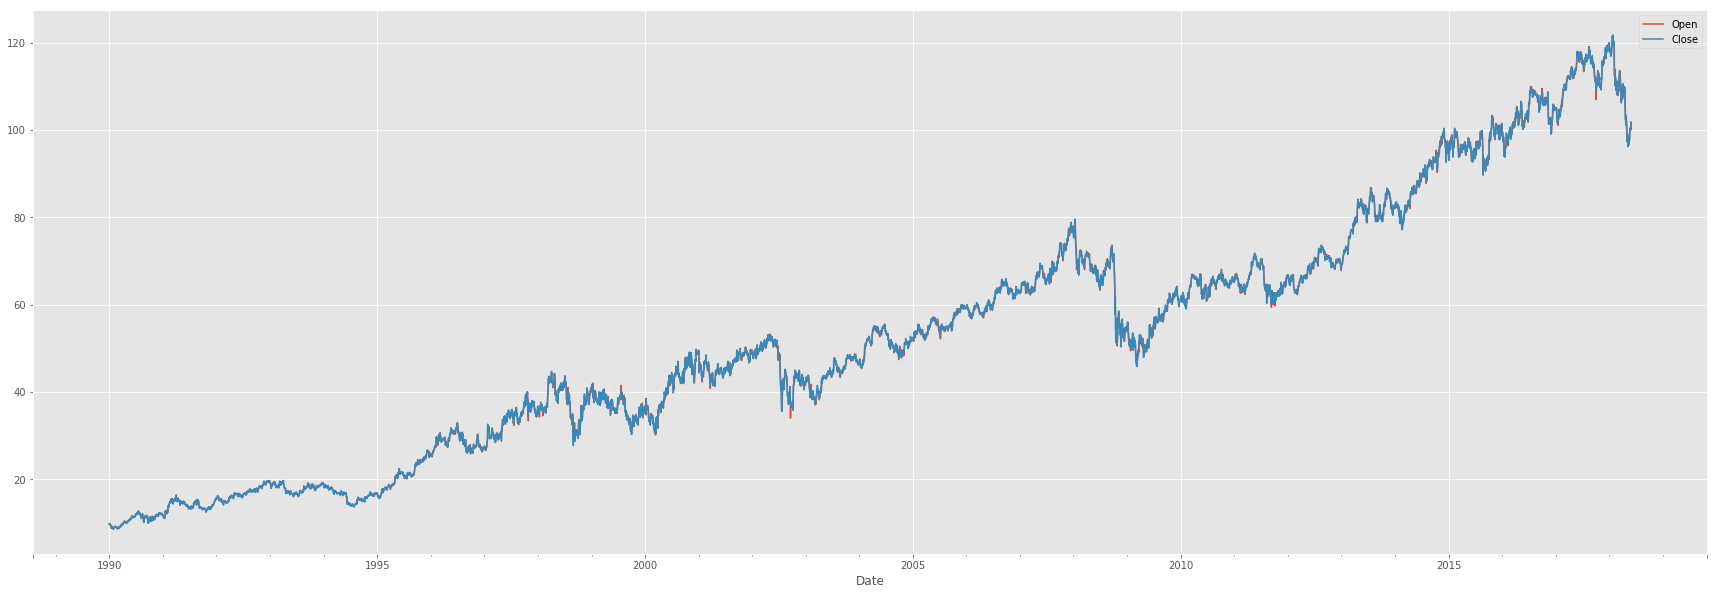

In [93]:
pep[['Open','Close']].plot()
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

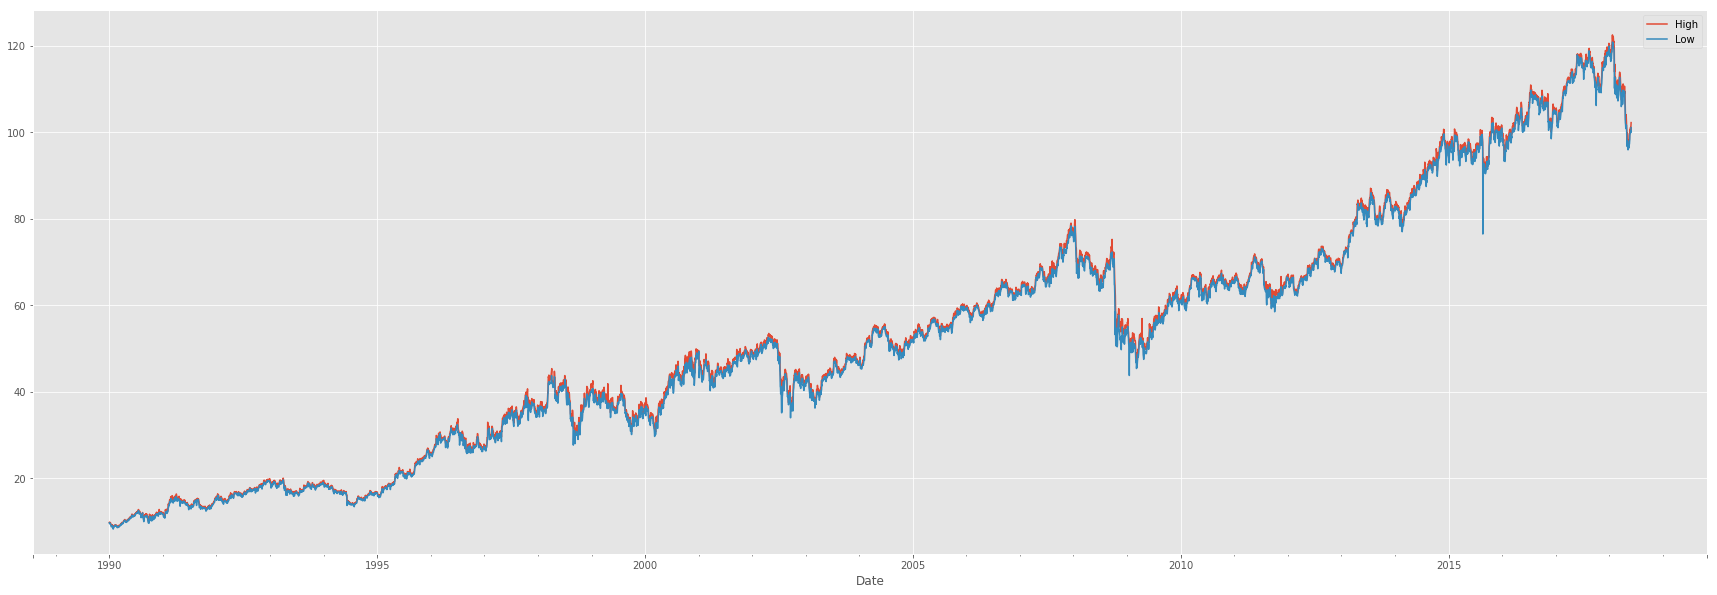

In [94]:
pep[['High', 'Low']].plot()
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

A simple moving average is to take a window of time, and calculate the average price in that window of time. Then we shift that window over one period, and do it again. We'll do a 100 day rolling moving average

In [95]:
pep['100days'] = pep['Close'].rolling(window=100,min_periods=0).mean()

In [96]:
pep.head()

,Close,High,Low,Open,Volume,100days
Date,,,,,,
1990-01-01,9.8039,9.8039,9.6699,9.8039,0,9.803900
1990-01-02,9.8423,9.8423,9.6316,9.8423,3468979,9.823100
1990-01-03,9.7465,9.8997,9.7274,9.7465,3722918,9.797567
1990-01-04,9.6507,9.7082,9.4975,9.6507,2993740,9.760850
1990-01-05,9.5167,9.6507,9.4401,9.5167,3759475,9.712020


We will graph the close and the 100ma on the first axis, and the volume on the 2nd axis


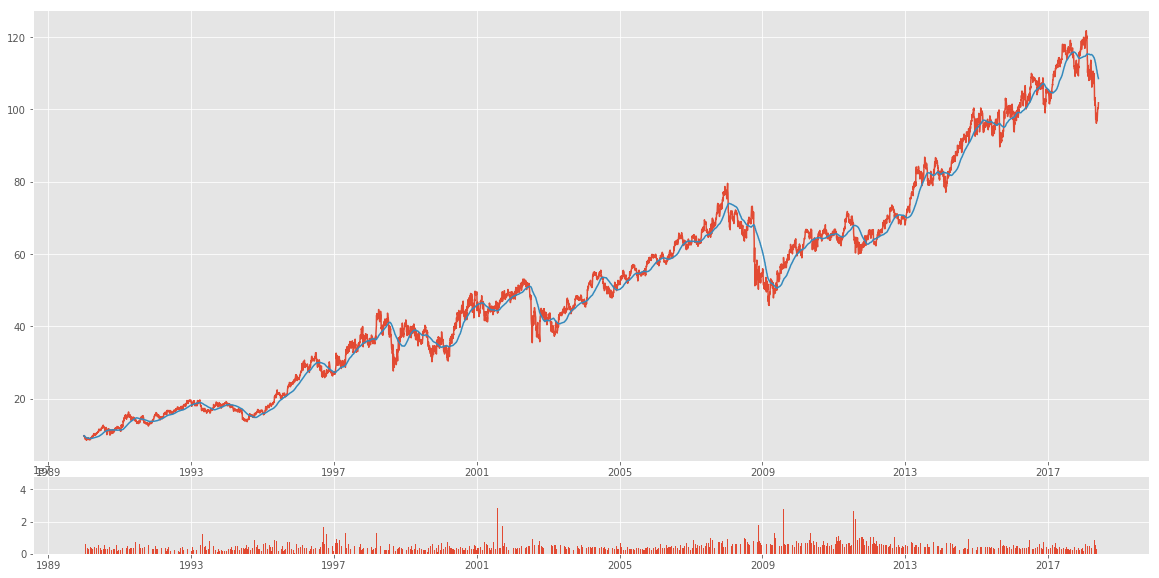

In [97]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.plot(pep.index, pep['Close'])
ax1.plot(pep.index, pep['100days'])
ax2.bar(pep.index, pep['Volume'])

plt.show()